In [49]:
import pandas as pd
data1=pd.read_csv("Data_2017.csv")
data2=pd.read_csv("Data_2018.csv")
data3=pd.read_csv("Data_2019.csv")
p_id1=data1['pollutant_id'].to_list()
date1=data1['date_time'].to_list()
p_value1=data1['pollutant_value'].to_list()

p_id2=data2['pollutant_id'].to_list()
date2=data2['date_time'].to_list()
p_value2=data2['pollutant_value'].to_list()

p_id3=data3['pollutant_id'].to_list()
date3=data3['date_time'].to_list()
p_value3=data3['pollutant_value'].to_list()

p_id=p_id1+p_id2+p_id3
date=date1+date2+date3
p_value=p_value1+p_value2+p_value3

date=[date[i] for i in range(len(p_id)) if(p_id[i]==6)]
CO_2017=[p_value[i] for i in range(len(p_id)) if(p_id[i]==6)]

for i in range(len(CO_2017)):
    if (CO_2017[i]=='BDL'):
        CO_2017[i]='nan'
    else:
        pass

for i in range(len(CO_2017)):
    if (CO_2017[i]=='nan'):
        CO_2017[i]='0'
    else:
        pass

        
#CO_2017=[int(CO_2017[i]) for i in range(len(CO_2017))]    
data=[[date[i], CO_2017[i]] for i in range(len(date))] 
data= pd.DataFrame(data, columns = ['Date', 'CO'])
data["CO"] = pd.to_numeric(data["CO"], downcast="float")
column_means = data['CO'].mean()
data['CO'].fillna(column_means)

data.head()

,Date,CO
0,01/01/2017 0:00,1554.890015
1,01/01/2017 1:00,1126.829956
2,01/01/2017 2:00,2066.790039
3,01/01/2017 3:00,1713.380005
4,01/01/2017 4:00,1685.310059


In [50]:
#Printing the date upto period 'Day'
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('H')
#Drops all rows with missing values
#data=data.dropna()
#Setting the date column as an index column to allow resampling
data=data.set_index('Date')
#Resampling data to give only the mean daily CO concentrations
data=data.resample('D').mean()
data['date'] = data.index
#data['date'] = pd.to_datetime(data['date']).dt.to_period('D')
#mean_value=data['CO'].
#Deriving the lists of Date and CO columns of the data
Date=data['date'].to_list()
CO  =data['CO'].to_list()
date=[i+1 for i in range(len(CO)) ]
#Generating timeseries data based on the two lists
data= pd.Series(CO,Date)
CO=pd.Series(CO)


In [51]:
from warnings import simplefilter

import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedRegressionForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt




/opt/anaconda3/envs/Project/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/Project/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


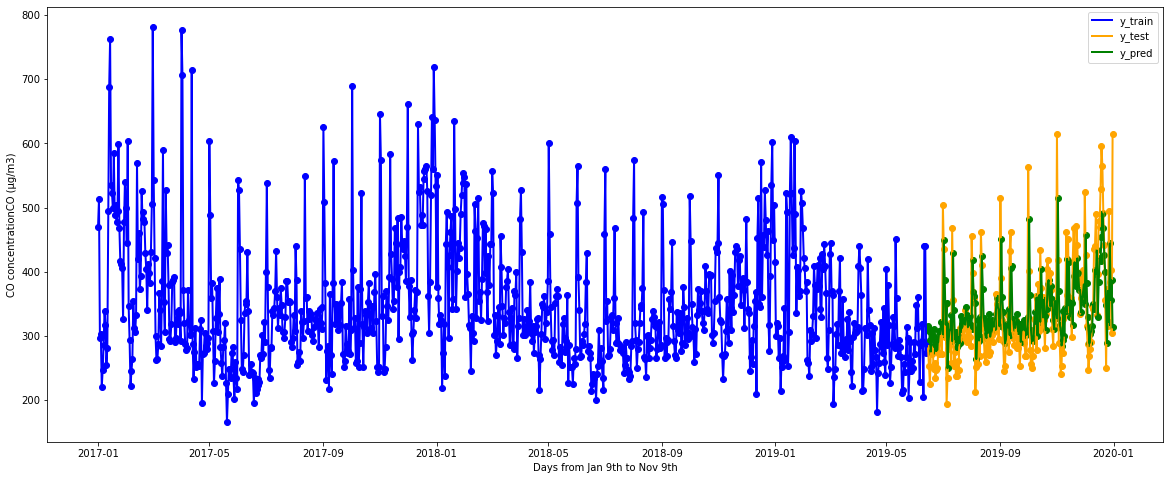

0.14203372322000699

In [52]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
y =data
y.index = y.index.to_timestamp()
y_train, y_test = temporal_train_test_split(y, test_size=200)
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(y_train), len(y_train)+199)

fig= plt.figure(figsize=(20,8))

#y_train, y_test = temporal_train_test_split(y, test_size=)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=200)
CO_train, CO_test = temporal_train_test_split(CO, test_size=200)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

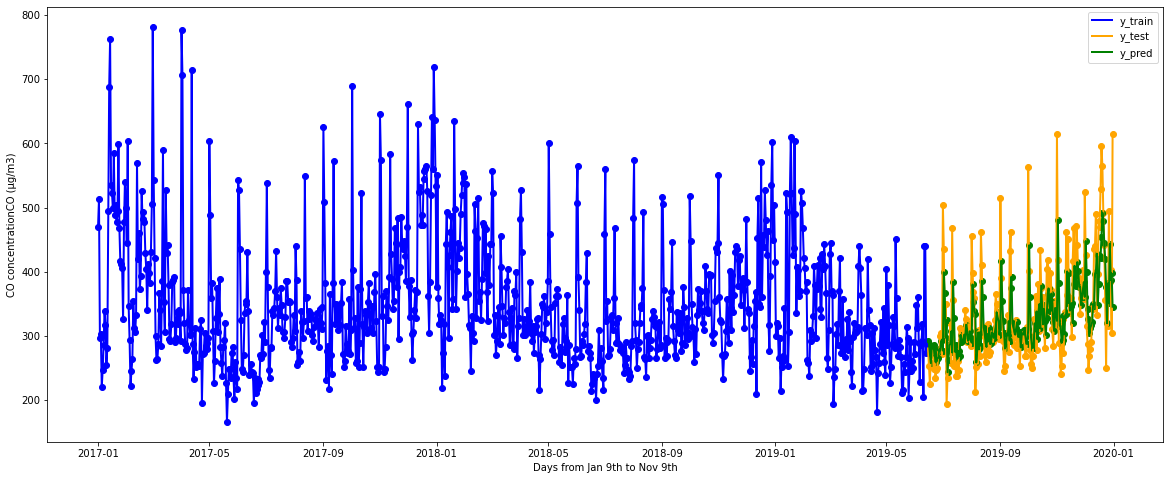

0.12934584311593583

In [54]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA
from random import random
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
y_pred = model_fit.predict(len(y_train), len(y_train)+199, typ='levels')
fig= plt.figure(figsize=(20,8))

#y_train, y_test = temporal_train_test_split(y, test_size=)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=200)
CO_train, CO_test = temporal_train_test_split(CO, test_size=200)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)

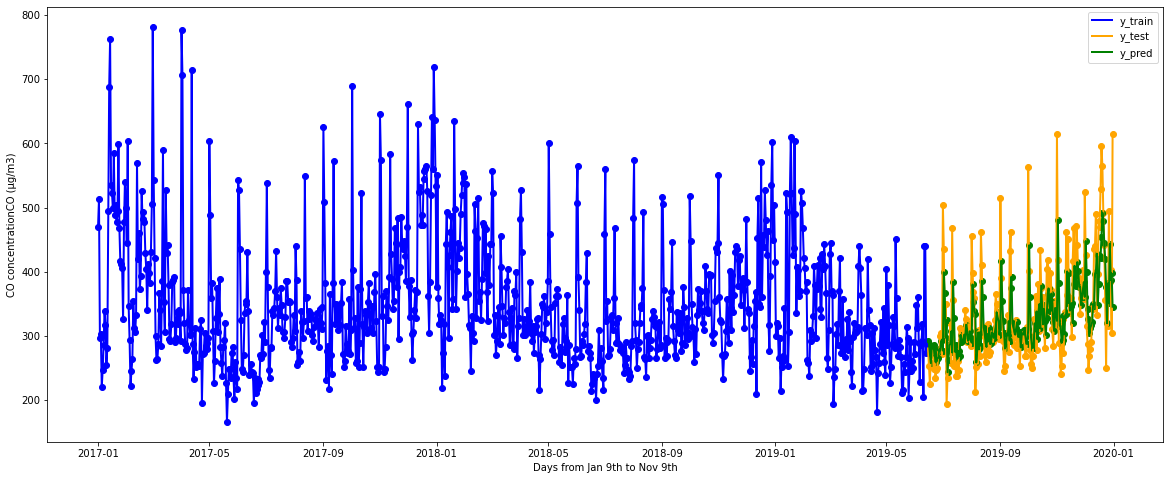

0.12934584311593583

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
y_pred = model_fit.predict(len(y_train), len(y_train)+199)
fig= plt.figure(figsize=(20,8))

#y_train, y_test = temporal_train_test_split(y, test_size=)
y_train_ind, y_test_ind = temporal_train_test_split(y.index, test_size=200)
CO_train, CO_test = temporal_train_test_split(CO, test_size=200)
#print(y_train.shape[0], y_test.shape[0])
#x_train=[i+1 for i in range(len(y_train))]
#x_test=[i+1 for i in range(len(y_train),len(y))]
plt.plot(y_train,color='blue',linewidth=2)
plt.scatter(y_train_ind,CO_train, color='blue')
plt.plot(y_test,color='orange',linewidth=2)
plt.scatter(y_test_ind,CO_test, color='orange')
plt.plot(y_pred,color='green',linewidth=2)
plt.scatter(y_test_ind,y_pred, color='green')
plt.legend(['y_train', 'y_test','y_pred'], loc='upper right')
plt.xlabel('Days from Jan 9th to Nov 9th')
plt.ylabel( 'CO concentrationCO (μg/m3)')
#plt.plot(X3,y1,color='orange',linewidth=3)
#plt.title('Sigmoid and sine function')
#plt.grid(True)
plt.show()
smape_loss(y_pred, y_test)